In [530]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as  pd
%run funciones.ipynb

In [531]:
df = pd.read_csv("dataset_mop.csv", encoding="ISO-8859-1")

In [532]:
columns = {
    "idproyecto": "proyecto_id",
    "numeroobra": "numeroobra",
    "codigobapin": "codigo_bapin",
    "fechainicio": "fecha_inicio",
    "fechafin": "fecha_fin",
    "nombreobra": "nombre_obra",
    "descripicionfisica": "descripcion_fisica",
    "montototal": "monto_total",
    "sectorid": "sector_id",
    "sectornombre": "sector_nombre",
    "avancefinanciero": "avance_financiero",
    "avance_fisico": "avance_fisico",
    "entidadejecutoraid": "entidad_ejecutora_id",
    "entidadejecutoranombre": "entidad_ejecutora_nombre",
    "duracionobra": "duracion_obra",
    "plazodias": "plazo_dias",
    "objetivogeneral": "objetivo_general",
    "tipoproyecto": "tipo_proyecto",
    "nombredepto": "depto",
    "nombreprovincia": "provincia",
    "codigobahra": "codigo_bahra",
    "etapaobra": "etapa_obra",
    "numerosaf": "numero_saf",
    "tipomoneda": "moneda_id",
}

In [533]:
# Elimino fechainiciomes, fechainicioanio, fechafinmes, fechafinanio,
df = df.drop(labels=["fechainiciomes", "fechainicioanio", "fechafinmes", "fechafinanio"], axis=1)

# Renombrar columnas

In [534]:
for c in columns.items():
    df.columns = df.columns.str.replace(c[0], c[1])

# Limpiar valores

In [535]:
# moneda_id to ISO 4217
df.loc[df['moneda_id'].eq("pesos argentinos"), "moneda_id"] = 'ARS'

/var/folders/xn/7r_77mhs5q57f148g277d6sspmz18w/T/ipykernel_55432/89360975.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(proy[var].str.upper(), fontdict={'horizontalalignment': 'right', 'size':10}, rotation=50)


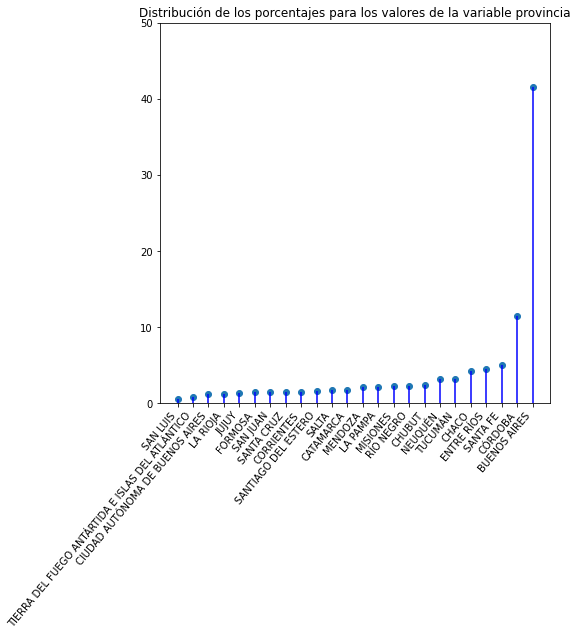

In [536]:
draw_distr(df, "provincia", maxy=50)

/var/folders/xn/7r_77mhs5q57f148g277d6sspmz18w/T/ipykernel_55432/89360975.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(proy[var].str.upper(), fontdict={'horizontalalignment': 'right', 'size':10}, rotation=50)


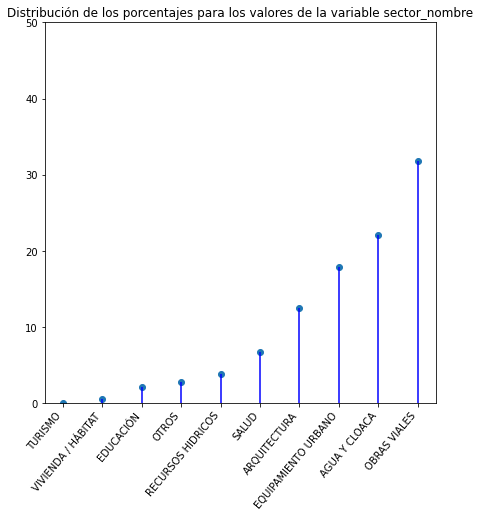

In [537]:
draw_distr(df, "sector_nombre", maxy=50)

In [538]:
# Cambiar sector_nombre y sector_id a los que tienen sector_nombre OTROS y su tipo_proyecto es REPAVIMENTACION DE CALZADA EXISTENTE
df.loc[ (df.sector_nombre=='OTROS') & (df.tipo_proyecto=='REPAVIMENTACION DE CALZADA EXISTENTE'), "sector_id"] = 1001
df.loc[ (df.sector_nombre=='OTROS') & (df.tipo_proyecto=='REPAVIMENTACION DE CALZADA EXISTENTE'), 'sector_nombre'] = 'OBRAS VIALES'

In [539]:
# Cambiar sector_nombre y sector_id a los que tienen sector_nombre OTROS y su descripcion_fisica es REPAVIMENTACION DE CALZADA EXISTENTE
df.loc[ (df.sector_nombre=='OTROS') & (df.descripcion_fisica == "MEJORAMIENTO DE LA ESTRUCTURA Y TRANSITABILIDAD"), "sector_id"] = 1001
df.loc[ (df.sector_nombre=='OTROS') & (df.descripcion_fisica == "ADECUACIÓN DE LAS CONDICIONES DE TRANSITABILIDAD"), "sector_id"] = 1001
df.loc[ (df.sector_nombre=='OTROS') & (df.descripcion_fisica == "MEJORAMIENTO DE LA ESTRUCTURA Y TRANSITABILIDAD"), 'sector_nombre'] = 'OBRAS VIALES'
df.loc[ (df.sector_nombre=='OTROS') & (df.descripcion_fisica == "ADECUACIÓN DE LAS CONDICIONES DE TRANSITABILIDAD"), 'sector_nombre'] = 'OBRAS VIALES'


In [540]:
# Cambiar a sector_nombre a EQUIPAMIENTO URBANO el proyecto_id 1007351
df.loc[ (df.proyecto_id==1007351), "sector_id"] = 1004
df.loc[ (df.proyecto_id==1007351), 'sector_nombre'] = 'EQUIPAMIENTO URBANO'

In [541]:
# Cambiar a sector_nombre a AGUA Y CLOACA el proyecto_id 1007343
df.loc[ (df.proyecto_id==1007343), "sector_id"] = 1001
df.loc[ (df.proyecto_id==1007343), 'sector_nombre'] = 'AGUA Y CLOACA'

In [542]:
# Cambiar a sector_nombre a VIVIENDA / HABITAT los proyecto_id 1007370 y 1007371
df.loc[ (df.proyecto_id==1007370) | (df.proyecto_id==1007371), "sector_id"] = 1012
df.loc[ (df.proyecto_id==1007370) | (df.proyecto_id==1007371), 'sector_nombre'] = 'VIVIENDA / HÁBITAT'

In [543]:
# Cambiar a sector_nombre a EQUIPAMIENTO URBANO los proyecto_id 1003101854, 153025001 y 1003200728
df.loc[ (df.proyecto_id==1003101854) | (df.proyecto_id==1003200728) | (df.proyecto_id==153025001), "sector_id"] = 1004
df.loc[ (df.proyecto_id==1003101854) | (df.proyecto_id==1003200728) | (df.proyecto_id==153025001), 'sector_nombre'] = 'EQUIPAMIENTO URBANO'

# Ver descripcion / summary general del DF

In [592]:
df.describe()

,proyecto_id,numeroobra,monto_total,sector_id,avance_financiero,avancefisico,entidad_ejecutora_id,duracion_obra,plazo_dias,codigo_bahra,numero_saf,plazo_dias_normalizado
count,2.162000e+03,2162.000000,2.162000e+03,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2162.000000,2.162000e+03,668.000000,2162.000000
mean,8.189151e+08,101207.448196,3.107563e+08,1006.331175,47.704542,45.082794,1168.174376,1.005550,359.722479,2.727860e+14,551.423653,164.517114
std,3.850791e+08,54374.885878,1.139627e+09,5.435537,29.883096,39.246874,509.895078,1.836936,601.468028,2.856475e+14,103.174334,202.172925
min,1.001752e+06,306.000000,7.610100e+04,1001.000000,0.000000,0.000000,1001.000000,0.000000,0.000000,2.007000e+03,364.000000,0.000000
25%,1.003105e+09,105260.250000,8.833227e+06,1002.000000,30.000000,0.000000,1013.000000,0.000000,120.000000,6.364036e+13,604.000000,90.000000
50%,1.003109e+09,109247.500000,1.997827e+07,1004.000000,32.410000,36.935000,1075.000000,0.000000,180.000000,1.409107e+14,604.000000,150.000000
75%,1.003126e+09,125800.500000,7.972897e+07,1009.000000,66.835000,88.592500,1079.000000,1.000000,240.000000,5.000700e+14,613.000000,185.000000
max,1.003500e+09,500002.000000,1.568244e+10,1026.000000,100.000000,100.000000,3510.000000,14.000000,4932.000000,9.401400e+14,613.000000,4570.000000


# Distribucion de las duraciones de las obras en años

<AxesSubplot:title={'center':'Distribución de las duraciones de las obras (en años)'}, ylabel='Frequency'>

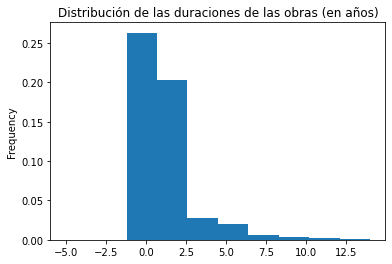

In [544]:
df["duracion_obra"].plot(kind="hist", density=True, title="Distribución de las duraciones de las obras (en años)")

# Analicemos los missing values

In [545]:
percent_missing = df.isnull().sum()  * 100 / len(df)
percent_missing

proyecto_id                  0.000000
numeroobra                   0.000000
codigo_bapin                 0.000000
fecha_inicio                 0.000000
fecha_fin                    0.000000
nombre_obra                  0.000000
descripcion_fisica           2.202473
monto_total                  0.000000
sector_id                    0.000000
sector_nombre                0.000000
avance_financiero            0.000000
avancefisico                 0.000000
entidad_ejecutora_id         0.000000
entidad_ejecutora_nombre     2.743431
duracion_obra                0.000000
plazo_dias                  16.460587
objetivo_general             2.202473
tipo_proyecto                0.000000
depto                        0.000000
provincia                    0.000000
codigo_bahra                16.460587
etapa_obra                   0.193199
numero_saf                  74.188563
moneda_id                    0.000000
dtype: float64

# Analicemos los valores que son 0 en plazo_dias

In [546]:
df[df == 0].count(axis=0)/len(df.index)

proyecto_id                 0.000000
numeroobra                  0.000773
codigo_bapin                0.000000
fecha_inicio                0.000000
fecha_fin                   0.000000
nombre_obra                 0.000000
descripcion_fisica          0.000000
monto_total                 0.000386
sector_id                   0.000000
sector_nombre               0.000000
avance_financiero           0.105873
avancefisico                0.268934
entidad_ejecutora_id        0.000000
entidad_ejecutora_nombre    0.000000
duracion_obra               0.500000
plazo_dias                  0.001932
objetivo_general            0.000000
tipo_proyecto               0.000000
depto                       0.000000
provincia                   0.000000
codigo_bahra                0.000000
etapa_obra                  0.000000
numero_saf                  0.000000
moneda_id                   0.000000
dtype: float64

# Removemos los NaN value de plazo_dias para analizar su relación con duracion_obra

In [547]:
df.dropna(subset = ["plazo_dias"], inplace=True)

In [548]:
df["plazo_dias_normalizado"] = abs(df["duracion_obra"] * 365 - df["plazo_dias"])

In [549]:
df[["plazo_dias_normalizado", "duracion_obra", "plazo_dias"]].sort_values(by="plazo_dias_normalizado", ascending=False)

,plazo_dias_normalizado,duracion_obra,plazo_dias
480,4570.0,14,540.0
479,2750.0,10,900.0
478,2470.0,8,450.0
476,2200.0,8,720.0
777,1840.0,8,1080.0
...,...,...,...
2532,0.0,2,730.0
1085,0.0,1,365.0
2497,0.0,1,365.0
1604,0.0,1,365.0


<AxesSubplot:title={'center':'Comparación entre años y días de duración'}>

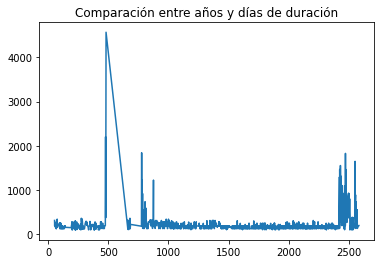

In [550]:
df[df["plazo_dias_normalizado"] > 90]["plazo_dias_normalizado"].plot(title="Comparación entre años y días de duración")

# Diferencia entre plazo_dias y los dias convertidos desde duracion_obra

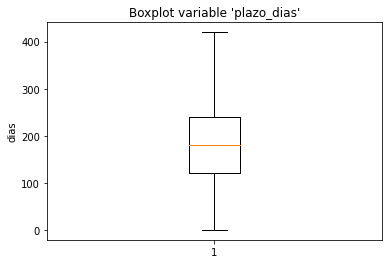

In [551]:
draw_boxplot(df, "plazo_dias", "dias")

/var/folders/xn/7r_77mhs5q57f148g277d6sspmz18w/T/ipykernel_55432/89360975.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(proy[var].str.upper(), fontdict={'horizontalalignment': 'right', 'size':10}, rotation=50)


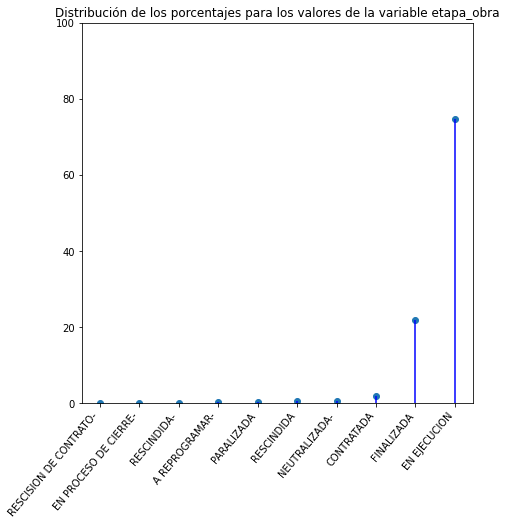

In [552]:

draw_distr(df, "etapa_obra", maxy=100)

# Distribución gastos entre las provincias

In [591]:
# Necesitamos cuánto se Sanciónó para cada provincia
df_biv1 = df[["monto_total", "provincia"]]
df_biv1 = df_biv1.groupby(['provincia'], as_index=False).sum()
df_biv1["monto_total"] = df_biv1["monto_total"] / 1000000

Text(0, 0.5, 'Gasto')

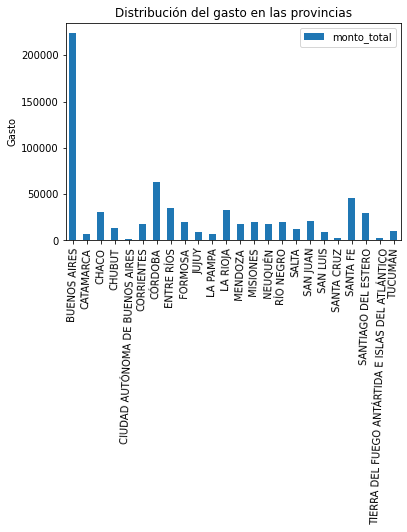

In [590]:
df_biv1.plot(kind='bar',x='provincia',y='monto_total', rot=88)
plt.title("Distribución del gasto en las provincias")
plt.xlabel("")
plt.ylabel("Gasto")